(224, 224, 3)


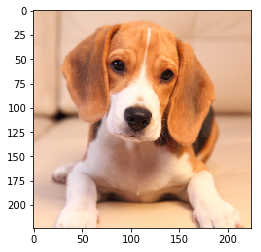

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import vgg16
import utils

%matplotlib inline

img1 = utils.load_image("./test_data/dog.png")

print img1.shape


batch = img1.reshape((1, 224, 224, 3))

#plot the image

imgshow1=plt.imshow(img1)


In [15]:
# imgshow2=plt.imshow(img2)




In [16]:
# with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.7)))) as sess:
with tf.device('/cpu:0'):
    with tf.Session() as sess:
        images = tf.placeholder("float", [1, 224, 224, 3])
        feed_dict = {images: batch}

        vgg = vgg16.Vgg16()
        with tf.name_scope("content_vgg"):
            vgg.build(images)

        prob = sess.run(vgg.prob, feed_dict=feed_dict)
        top5 = np.argsort(prob[0])[-1:-6:-1]
        for n, label in enumerate(top5):
            print label
        pool1 = sess.run(vgg.pool1, feed_dict=feed_dict)
        print pool1.shape
        conv3_3=sess.run(vgg.conv3_3, feed_dict=feed_dict)
        print conv3_3.shape

/home/wli/DeepLearningCourseCodes/course_example_vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s
162
167
166
164
241
(1, 112, 112, 64)
(1, 56, 56, 256)


In [26]:
#now let's plot the model filters
vgg = vgg16.Vgg16()

#get the saved parameter dict keys
print vgg.data_dict.keys()

#show the first conv layer
filter_conv1=vgg.get_conv_filter("conv1_1")
print 'filter_conv1', filter_conv1.shape

tf.Print(filter_conv1[:,:,:,:5],[filter_conv1[:,:,:,:5]])

filter_conv3=vgg.get_conv_filter("conv3_3")
print 'filter_conv3', filter_conv3.shape

tf.Print(filter_conv3[:,:,:3,:5],[filter_conv3[:,:,:3,:5]])



/home/wli/DeepLearningCourseCodes/course_example_vgg/vgg16.npy
npy file loaded
['conv5_1', 'fc6', 'conv5_3', 'fc7', 'fc8', 'conv5_2', 'conv4_1', 'conv4_2', 'conv4_3', 'conv3_3', 'conv3_2', 'conv3_1', 'conv1_1', 'conv1_2', 'conv2_2', 'conv2_1']
filter_conv1 (3, 3, 3, 64)
filter_conv3 (3, 3, 256, 256)


<tf.Tensor 'Print_1:0' shape=(3, 3, 3, 5) dtype=float32>